Shap value for project features and content categories

guidelines:

SHAP intro: https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

SHAP with Random forest: https://www.kaggle.com/code/vikumsw/explaining-random-forest-model-with-shapely-values

SHAP with XGboost: https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Basic%20SHAP%20Interaction%20Value%20Example%20in%20XGBoost.html

In [34]:
# pip install xgboost

In [1]:
import pandas as pd
import json
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
# shap.initjs()
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from matplotlib.colors import LinearSegmentedColormap
import xgboost
from xgboost import XGBClassifier

In [3]:
# Change your file location here na
with open('datset/AllPackages_rename_2025.json', 'r', encoding='utf-8') as file:
    raw_data = json.load(file)

In [4]:
selected_columns = ['SecurityPolicy_content_category', 'num_commits', 'num_contributors', 'num_issues', 'num_pull', 'project_age_days', 'num_stargazers']
data = []
for item in raw_data:
    filtered_item = {key: item[key] for key in selected_columns if key in item}
    data.append(filtered_item)

df = pd.DataFrame(data)
df.head()

categories = ['Generic policy', 'Reporting mechanism', 'Scope of practice', 
              'User guideline', 'History of vulnerability', 'Additional information', 
              'Information on maintainer']
features = ['num_commits', 'num_contributors', 'num_issues', 
            'num_pull', 'project_age_days', 'num_stargazers']

In [5]:
# Change category to be analyzed here
def check_generic_policy(categories):
    return 1 if isinstance(categories, list) and 'Generic policy' in categories else 0

In [6]:
# Train model
df['SecurityPolicy_content_category'] = df['SecurityPolicy_content_category'].apply(check_generic_policy)

df = df[features + ['SecurityPolicy_content_category']]

X = df[features]
y = df['SecurityPolicy_content_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=0.1, objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(f"Model Accuracy: {score:.2f}")

y_pred = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       145
           1       0.00      0.00      0.00        59

    accuracy                           0.71       204
   macro avg       0.36      0.50      0.42       204
weighted avg       0.51      0.71      0.59       204



/Users/beenayaknon/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:51:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/beenayaknon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/beenayaknon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/beenayaknon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classificat

100%|██████████| 204/204 [00:01<00:00, 117.43it/s]


Text(0.5, 12.622222222222222, 'SHAP value for Generic policy')

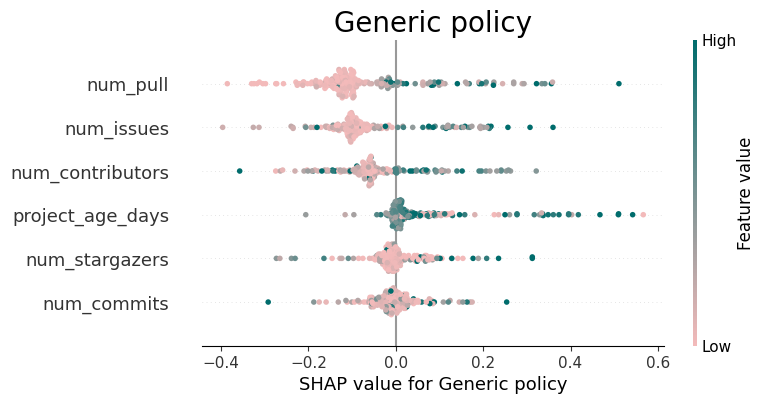

In [40]:
# Caluculate Shap

explainer = shap.KernelExplainer(clf.predict, shap.kmeans(X_train, 10))
shap_values = explainer.shap_values(X_test)

cmap = LinearSegmentedColormap.from_list("custom", ["#f3baba", "#006C6C"])
shap.summary_plot(shap_values, X_test, cmap=cmap, show=False)
plt.title("Generic policy", fontsize=20)
plt.xlabel("SHAP value for Generic policy")

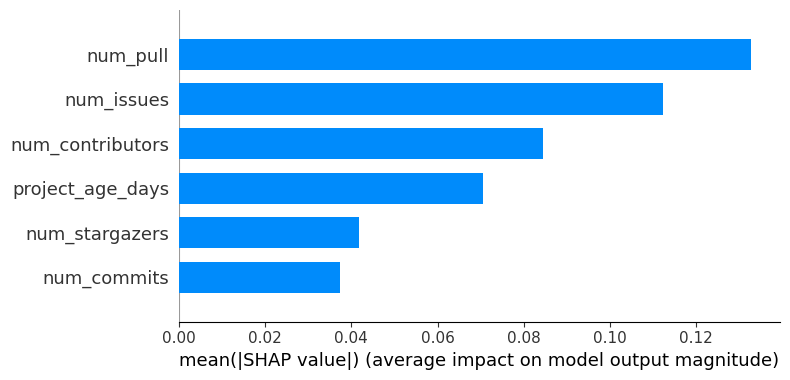

In [41]:
shap.summary_plot(shap_values, X_test, cmap=cmap, plot_type="bar")

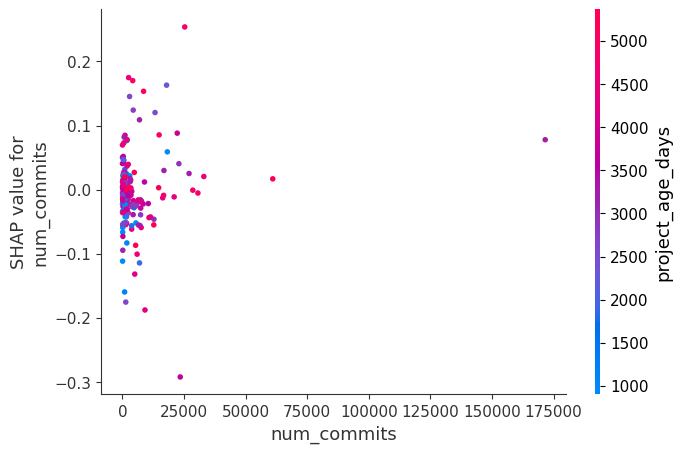

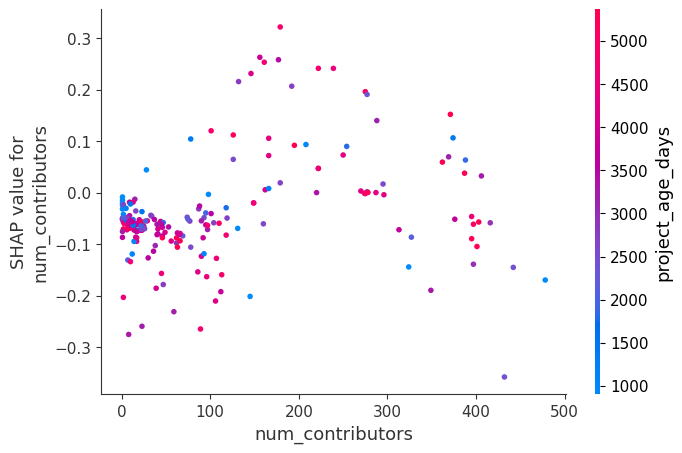

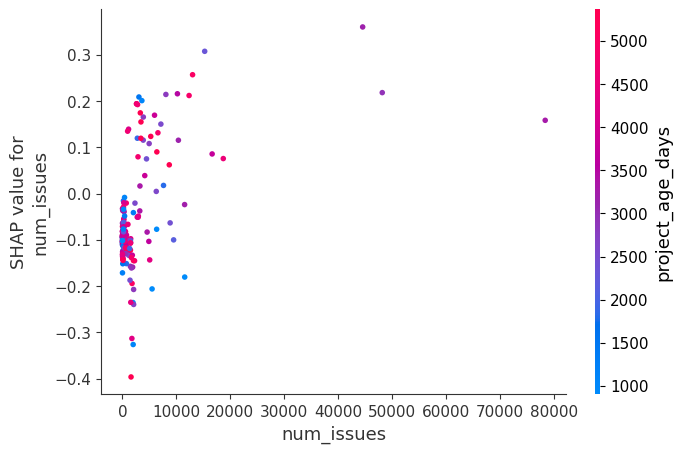

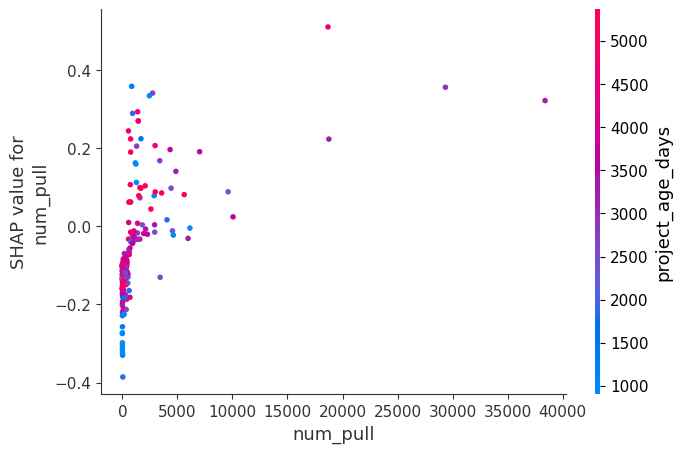

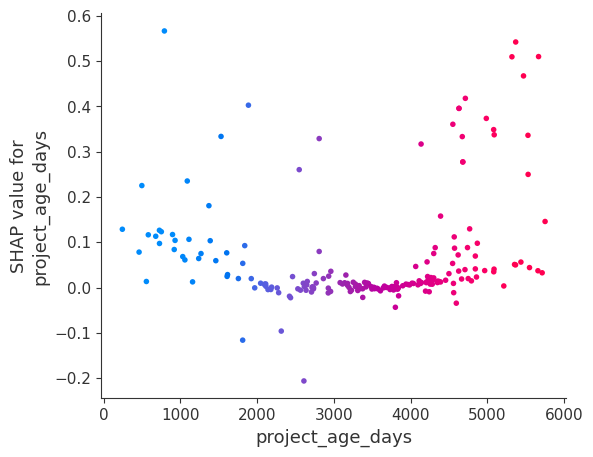

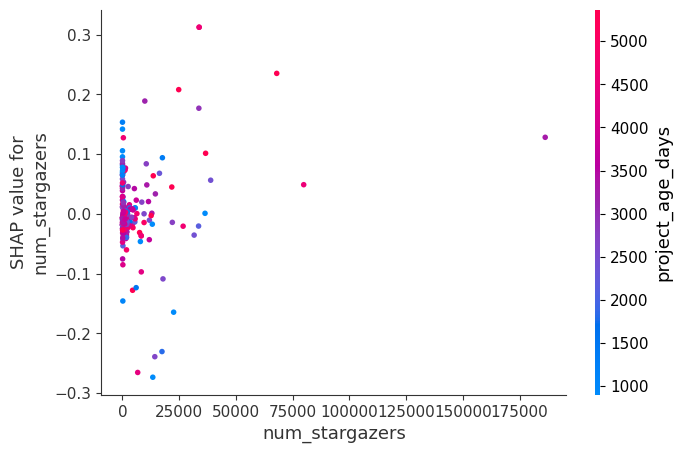

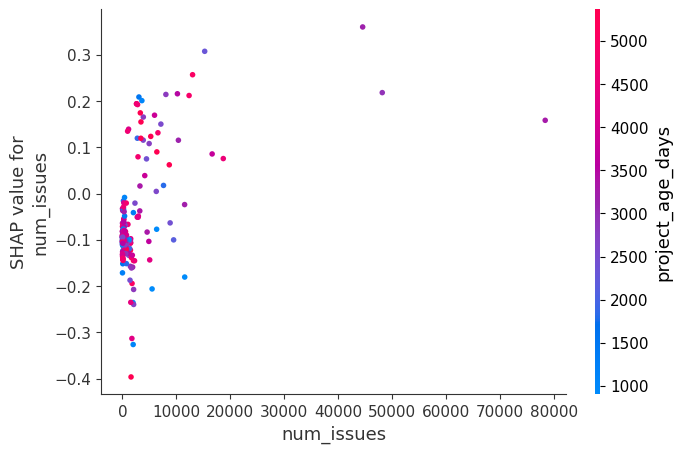

In [42]:
features = ['num_commits', 'num_contributors', 'num_issues', 
            'num_pull', 'project_age_days', 'num_stargazers']
for i in features:
    shap.dependence_plot(i, shap_values, X_test,interaction_index="project_age_days")
    
shap.dependence_plot("num_issues", shap_values, X_test,interaction_index="project_age_days")